Coloring of the map: {'A': 1, 'B': 2, 'C': 2, 'D': 3, 'E': 1}


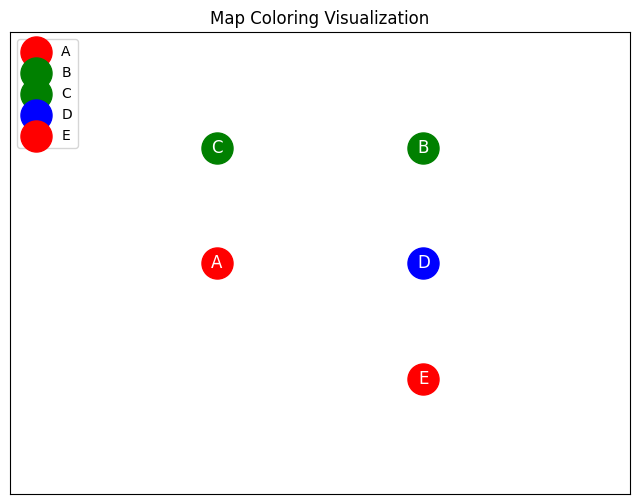

In [2]:
# Step 1: Install the matplotlib library
!pip install matplotlib

# Step 2: Run the map coloring code
import matplotlib.pyplot as plt

# Define the map as a graph using adjacency list
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'D'],
    'D': ['A', 'B', 'C', 'E'],
    'E': ['B', 'D']
}

# Function to check if coloring is safe
def is_safe(node, color, coloring):
    for neighbor in graph[node]:
        if neighbor in coloring and coloring[neighbor] == color:
            return False
    return True

# Backtracking function to color the graph
def map_coloring_util(nodes, m, coloring, index):
    if index == len(nodes):
        return True  # All nodes are colored

    node = nodes[index]
    for color in range(1, m + 1):
        if is_safe(node, color, coloring):
            coloring[node] = color  # Assign color
            if map_coloring_util(nodes, m, coloring, index + 1):
                return True
            del coloring[node]  # Backtrack

    return False

# Function to color the map
def map_coloring(m):
    nodes = list(graph.keys())
    coloring = {}
    if not map_coloring_util(nodes, m, coloring, 0):
        print("No solution exists")
        return None
    return coloring

# Function to visualize the coloring
def draw_colored_map(coloring):
    # Define colors
    color_map = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'cyan'}

    # Node positions for visualization
    positions = {
        'A': (0, 1),
        'B': (1, 2),
        'C': (0, 2),
        'D': (1, 1),
        'E': (1, 0)
    }

    plt.figure(figsize=(8, 6))

    for node, color in coloring.items():
        plt.scatter(*positions[node], s=500, color=color_map[color], label=node)
        plt.text(positions[node][0], positions[node][1], node, fontsize=12, ha='center', va='center', color='white')

    plt.title("Map Coloring Visualization")
    plt.xlim(-1, 2)
    plt.ylim(-1, 3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.legend(loc='upper left')
    plt.show()

# Number of colors
m = 3
coloring = map_coloring(m)

# Print the coloring result and visualize it
if coloring:
    print("Coloring of the map:", coloring)
    draw_colored_map(coloring)
